# Intro a Visualización de datos en python

In [1]:
# instalar la extensión watermark con `conda install watermark`
%load_ext watermark
%watermark

Last updated: 2021-08-13T11:35:13.365487+01:00

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.23.1

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-80-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



### Cargamos el dataset

Vamos a usar un dataset clásico para empezar a aprender técnicas de visualización. Se trata del Boston Housing Dataset. Recopilado en 1976 y publicado en el Paper [Hedonic Housing Prices and the Demand for Clean Air](https://www.law.berkeley.edu/files/Hedonic.PDF)

Consiste en mediciones de distintas zonas del área de Boston, teniendo como variables independientes un conjunto de mediciones de la habitabilidad de dichas zonas, y como variable independiente el valor medio de las casas en dicha zona.

En concreto vamos a usar un [dataset actualizado](http://lib.stat.cmu.edu/datasets/boston_corrected.txt) que incluye la geolocalización estimada de las mediciones.

In [3]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

### Gráficos básicas con pandas

### Cómo elegir el gráfico

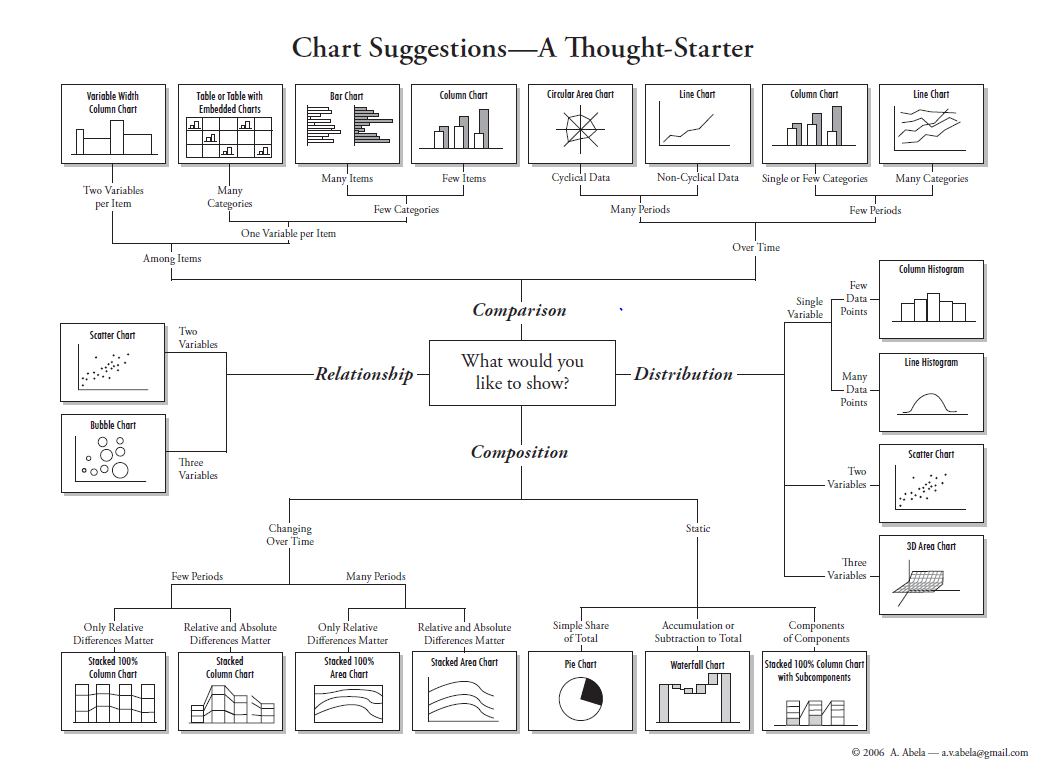

In [6]:
from IPython.display import Image
Image("../../media/chart-chooser-data-visualization.png")


[Aquí hay una herramienta online para ayudar a decidir el tipo de gráfico a usar](http://labs.juiceanalytics.com/chartchooser/index.html)

Pandas usa [matplotlib](https://matplotlib.org/) como backend. [Aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) está la documentación de visualización de Pandas

In [1]:
import matplotlib.pyplot as plt

# plt.close("all") cierra todo lo que matplotlib tenga abierto anteriormente
plt.close("all")

### Scatter Plot / gráfico de dispersión

Los gráficos de dispersión son una de las mejores formas de representar la relación entre dos variables

<IPython.core.display.Javascript object>


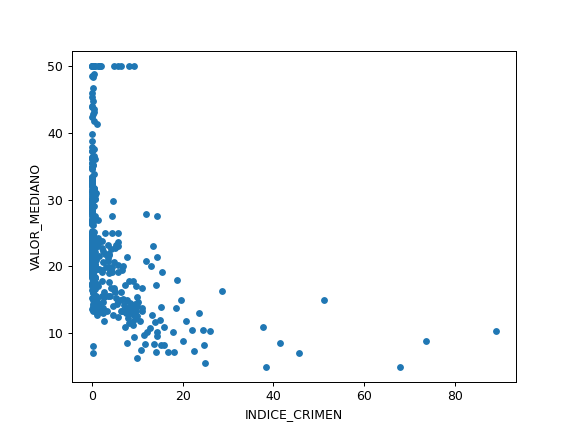

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='VALOR_MEDIANO'>

In [8]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")

In [8]:
plt.show()

<div style="color:blue" class="alert alert-block alert-warning">
<b>Actualizacion Mayo 2021:</b> Si la siguiente linea no cambia el tipo de visualizacion de matplotlib.
    
Se puede probar a <b>reiniciar el notebook y ejecutar dicha linea lo primero de todo</b>
</div>

In [5]:
%matplotlib notebook

<div style="color:blue" class="alert alert-block alert-warning">
<b>Actualizacion Mayo 2021:</b> La manera de hacer graficos con pandas cambio hace unas versiones.
    
 En los videos muestro esta forma:
</div>

<IPython.core.display.Javascript object>


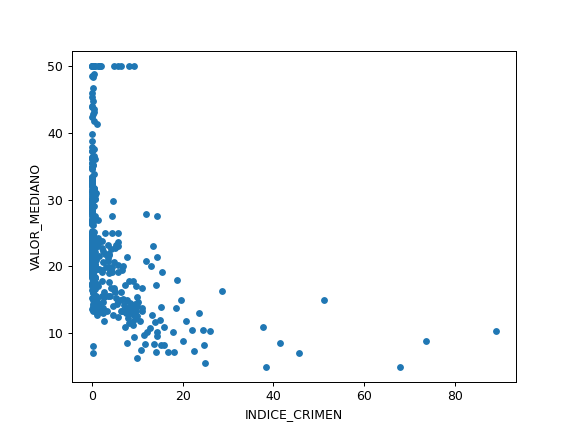

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='VALOR_MEDIANO'>

In [6]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")
# es lo mismo que 
# df.plot(x="INDICE_CRIMEN", y="VALOR_MEDIANO", kind="scatter")

<div style="color:blue" class="alert alert-block alert-warning">
La manera actual de hacer plots es la siguiente:
</div>

<IPython.core.display.Javascript object>


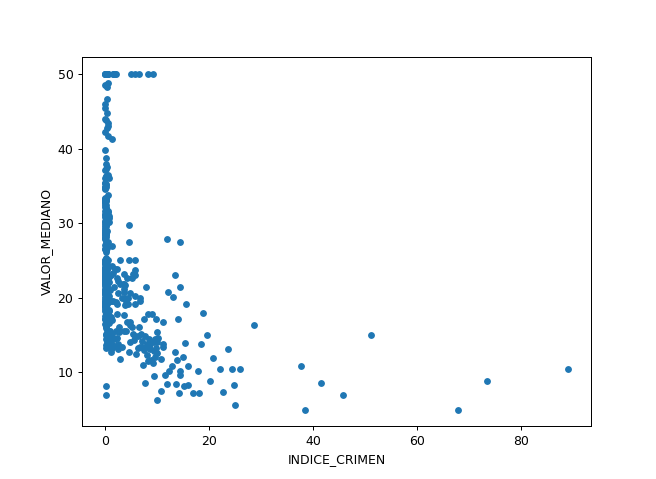

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='VALOR_MEDIANO'>

In [20]:
df.plot(x="INDICE_CRIMEN", y="VALOR_MEDIANO", kind="scatter")
# anteriormente df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")

### Gráfico Matriz de dispersión

Una de las primeras cosas que hago cuando obtengo un dataset nuevo es el hacer un gráfico de Matriz de dispersion. Basicamente es un diagrama en el que se representan las relaciones de una variable con la otra mediante diagramas de dispersión

<IPython.core.display.Javascript object>


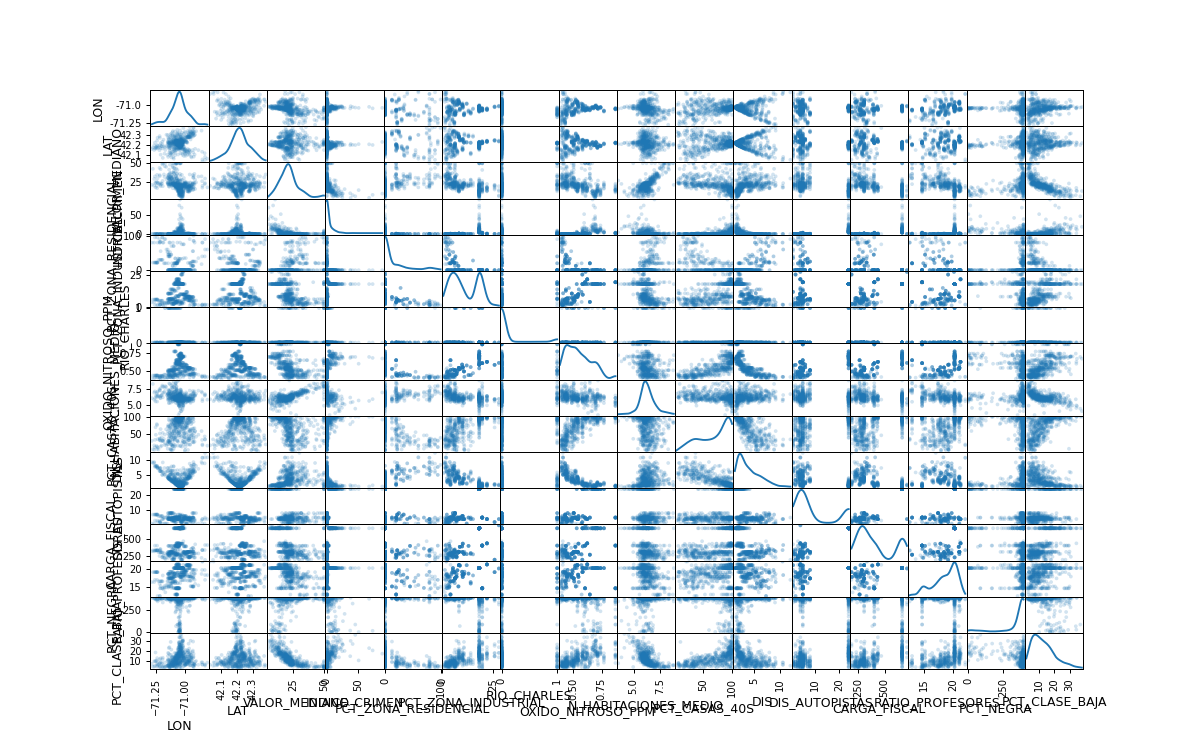

In [7]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [8]:
sm

array([[<AxesSubplot:xlabel='LON', ylabel='LON'>,
        <AxesSubplot:xlabel='LAT', ylabel='LON'>,
        <AxesSubplot:xlabel='VALOR_MEDIANO', ylabel='LON'>,
        <AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='LON'>,
        <AxesSubplot:xlabel='PCT_ZONA_RESIDENCIAL', ylabel='LON'>,
        <AxesSubplot:xlabel='PCT_ZONA_INDUSTRIAL', ylabel='LON'>,
        <AxesSubplot:xlabel='RIO_CHARLES', ylabel='LON'>,
        <AxesSubplot:xlabel='OXIDO_NITROSO_PPM', ylabel='LON'>,
        <AxesSubplot:xlabel='N_HABITACIONES_MEDIO', ylabel='LON'>,
        <AxesSubplot:xlabel='PCT_CASAS_40S', ylabel='LON'>,
        <AxesSubplot:xlabel='DIS', ylabel='LON'>,
        <AxesSubplot:xlabel='DIS_AUTOPISTAS', ylabel='LON'>,
        <AxesSubplot:xlabel='CARGA_FISCAL', ylabel='LON'>,
        <AxesSubplot:xlabel='RATIO_PROFESORES', ylabel='LON'>,
        <AxesSubplot:xlabel='PCT_NEGRA', ylabel='LON'>,
        <AxesSubplot:xlabel='PCT_CLASE_BAJA', ylabel='LON'>],
       [<AxesSubplot:xlabel='LON', ylabel='LAT'

Este es uno de los problemas de matplotlib, que su api es bastante complicada si quieres hacer algo que se salga de lo corriente. Por ejemplo, en este caso necesitamos un montón de código para rotar las etiquetas de los ejes

<IPython.core.display.Javascript object>


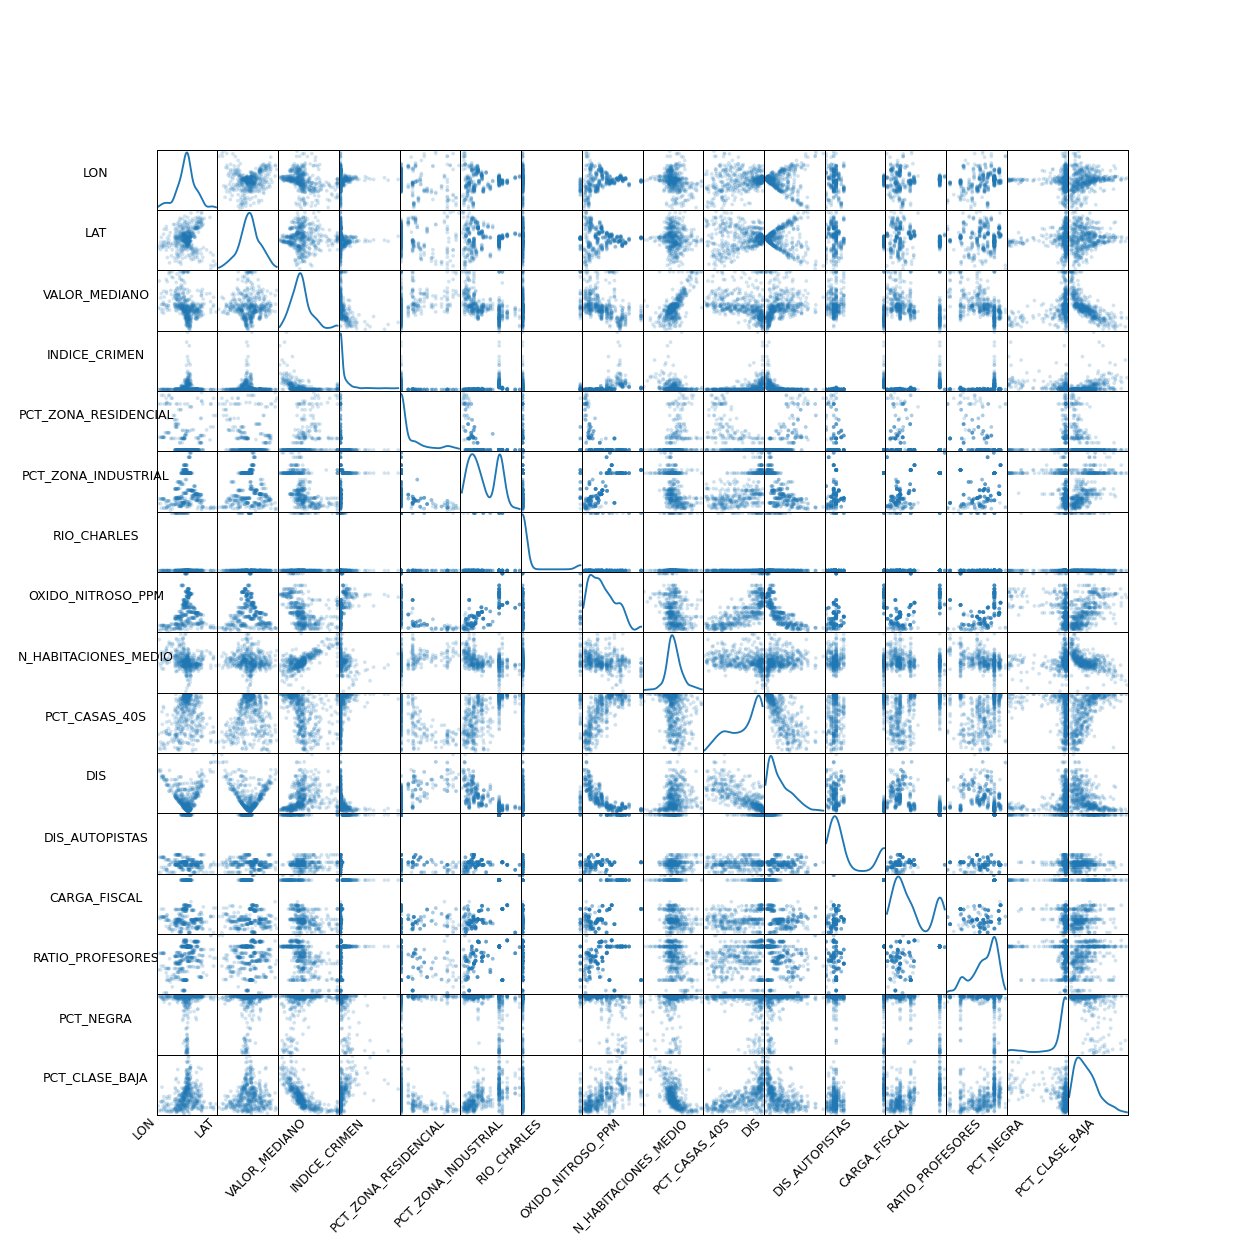

In [9]:
sm = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

<IPython.core.display.Javascript object>


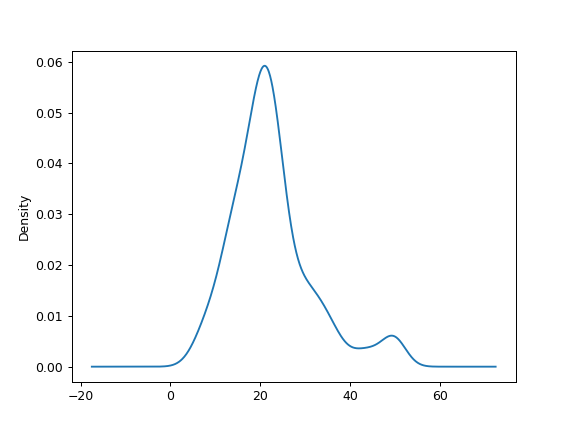

In [21]:
# anteriormente: df.VALOR_MEDIANO.plot.kde();
df.VALOR_MEDIANO.plot(kind='kde');

### Histograma

Los histogramas se usan para representar la distribucion de una variable, esto es, que rango de valores tiene, cuales son los valores más comunes

<IPython.core.display.Javascript object>


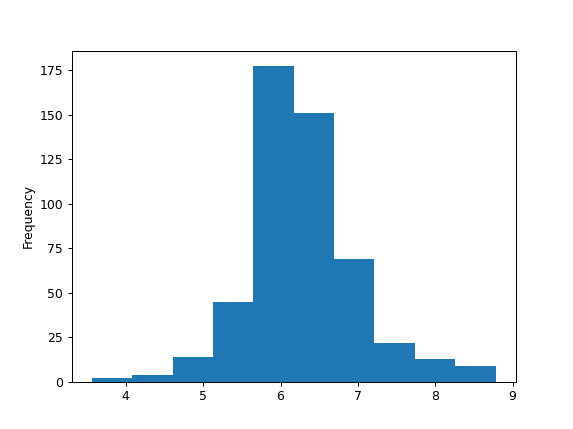

In [22]:
#anteriormente: df.N_HABITACIONES_MEDIO.plot.hist()
df.N_HABITACIONES_MEDIO.plot(kind='hist');

podemos especificar cuantos grupos queremos en el histograma

<IPython.core.display.Javascript object>


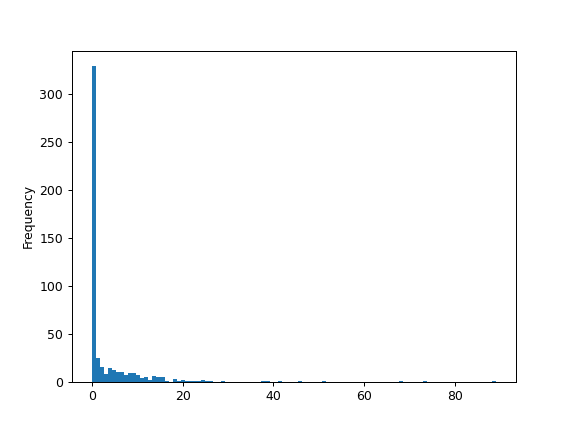

<AxesSubplot:ylabel='Frequency'>

In [23]:
# anteriormente: df.INDICE_CRIMEN.plot.hist(bins=100)
df.INDICE_CRIMEN.plot(kind="hist", bins=100)

Tambien podemos filtrar el gráfico poniendo límites a los ejes

<IPython.core.display.Javascript object>


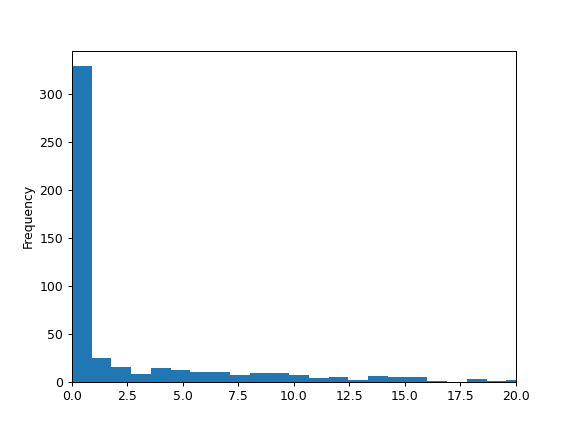

<AxesSubplot:ylabel='Frequency'>

In [24]:
# anteriormente: df.INDICE_CRIMEN.plot.hist(bins=100, xlim=(0,20))
df.INDICE_CRIMEN.plot(kind="hist", bins=100, xlim=(0,20))

### Gráfico de barras/columnas

Los gráficos de barras se utilizan comúnmente para representar y comparar una variable entre distintos grupos

In [15]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()
valor_por_ciudad.head()

CIUDAD
Arlington    25.2
Ashland      21.4
Bedford      30.1
Belmont      36.2
Beverly      20.8
Name: VALOR_MEDIANO, dtype: float64

<IPython.core.display.Javascript object>


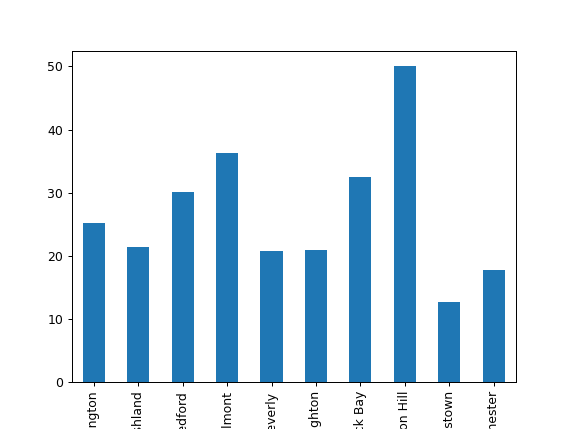

<AxesSubplot:xlabel='CIUDAD'>

In [18]:
#  anteriormente: valor_por_ciudad.head(10).plot.bar()
valor_por_ciudad.head(10).plot(kind="bar")

<IPython.core.display.Javascript object>


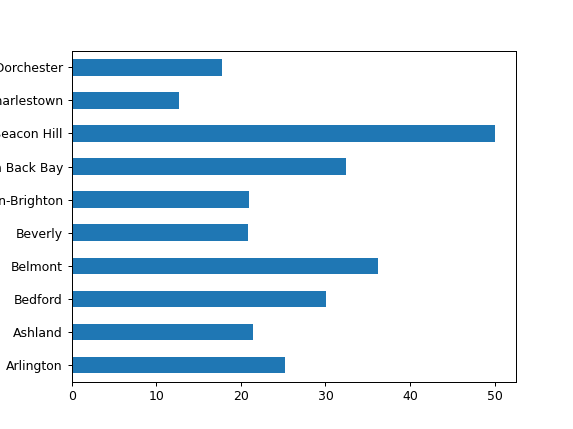

<AxesSubplot:ylabel='CIUDAD'>

In [19]:
# anteriormente: valor_por_ciudad.head(10).plot.barh()
valor_por_ciudad.head(10).plot(kind="barh")

## Gráfico de linea

Los gráficos de linea se usan principalmente para representar tendencias, esto es, se usan para variables que varian con el tiempo


<IPython.core.display.Javascript object>


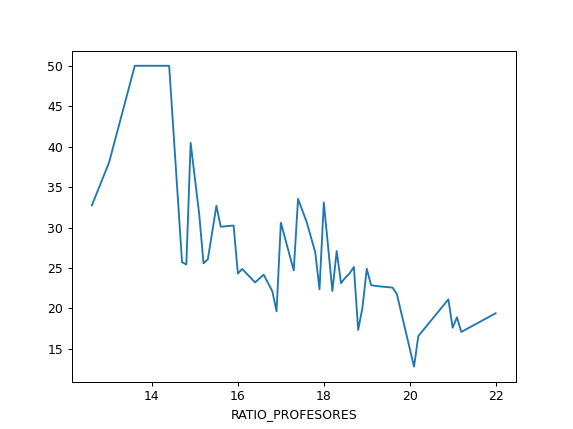

In [26]:
# pandas intenta deducir que tipo de grafico queremos en base a los datos usados
# en este caso con una serie normal de pandas(no hace falta especificar kind="line")
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot();

### Diagrama de caja (Box Plot)

Los diagramas de caja son útiles a la hora de representar grupos de datos y comparar entre ellos. Otra ventaja de los boxplots es que identifican de forma sencilla si una variable tiene muchos outliers, esto es, elementos que se alejan de los valores frecuentes de dicha variable.

In [27]:
df["VALOR_CUANTILES"] = pd.qcut(df.VALOR_MEDIANO, 5)

<IPython.core.display.Javascript object>


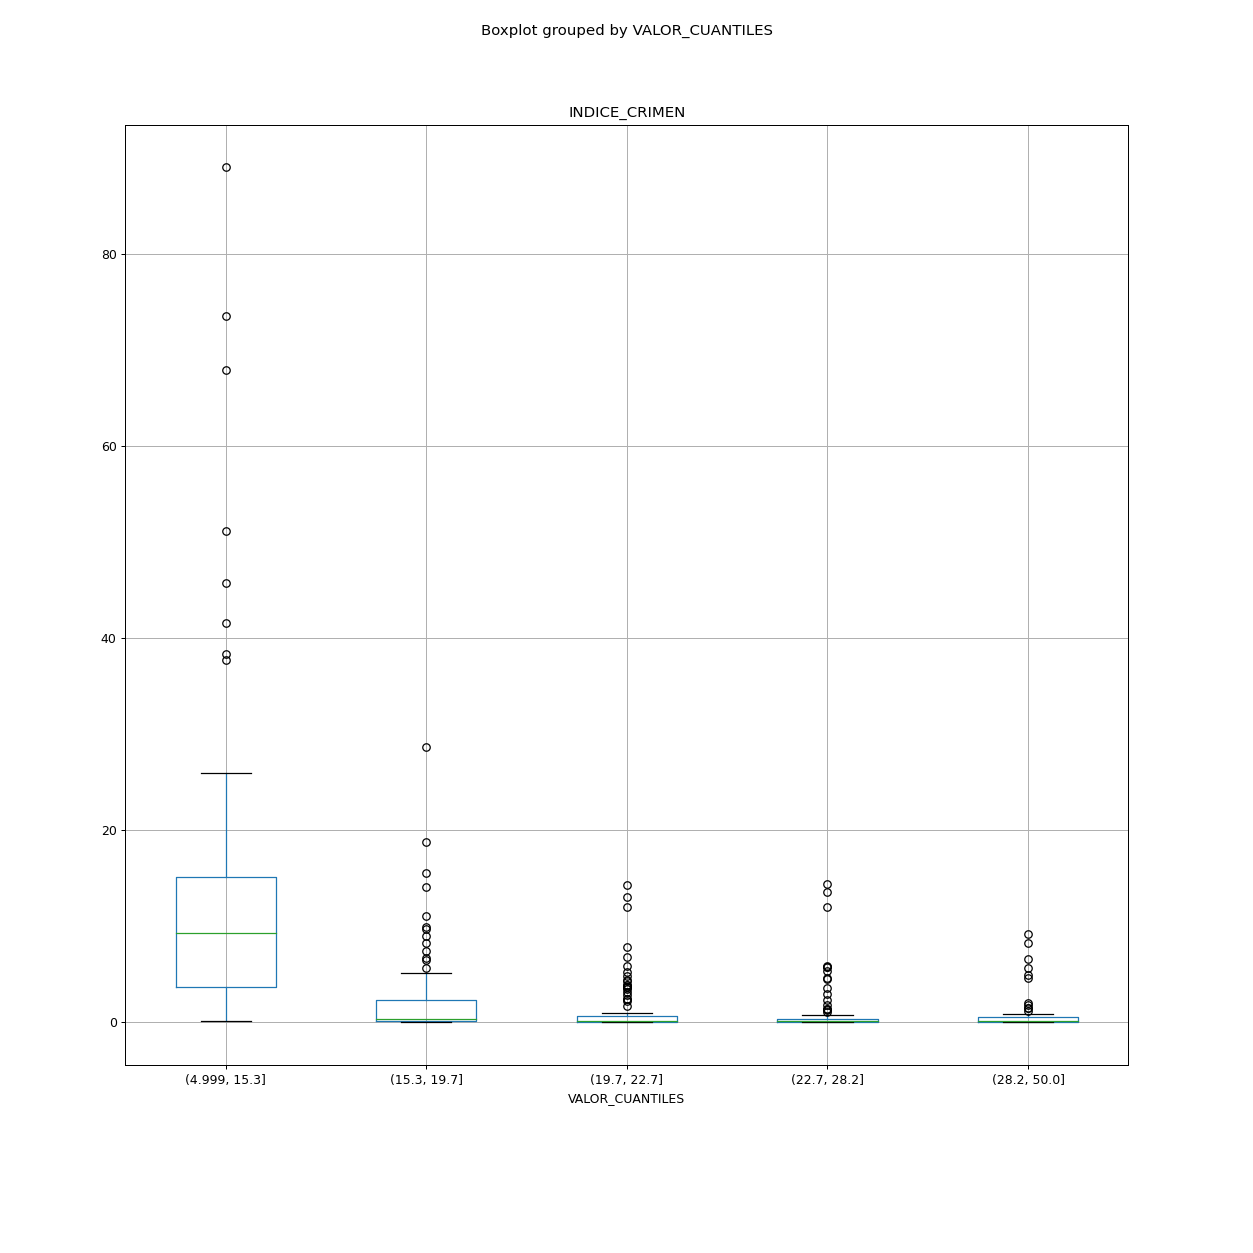

<AxesSubplot:title={'center':'INDICE_CRIMEN'}, xlabel='VALOR_CUANTILES'>

In [30]:
df.boxplot(column="INDICE_CRIMEN", by="VALOR_CUANTILES", figsize=(14,14))

### Gráfico circular

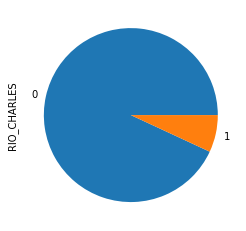

In [8]:
# anteriormente: df.RIO_CHARLES.value_counts().plot.pie()
df.RIO_CHARLES.value_counts().plot(kind="pie");